# Recipe Site Traffic Project

## Data Validation
This data set has 947 rows, 8 columns. I have validated all variables and I have  made some changes after validation. All the columns are just as described in the data dictionary:
- recipe: numeric values, same as the description. No cleaning is needed.
- calories: numeric values, It contained 52 missing values. Cleaning was made later on.
- carbohydrate: numeric values, It contained 52 missing values. Cleaning was made later on.
- sugar: numeric values, It contained 52 missing values. Cleaning was made later on.
- protein: numeric values, It contained 52 missing values. Cleaning was made later on.
**Note: We noticed that in these 52 missing values all the whole row containing fields calories, carbohydrates, sugar, and protein are missing so because they don't form a huge part of the data we decided to drop them**
- category: 11 categories without missing values, it contained one extra category called _'Chicken Breast'_ that we had to deal with and transform it into _'Chicken'_.
- servings: object that contained 2 extra fields _'6 as snack'_, and _'4 as snack'_ which where turned into their corresponding numbers (_6_ and _4_ respectively) and the whole column was transformed into numeric type.
- high_traffic: It contained one category _'High'_ and lots of missing value  which where assumed to be the low traffic and replaced with the wrod _'Low'_

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler,LabelEncoder, PowerTransformer, RobustScaler, MinMaxScaler,QuantileTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('./recipe_site_traffic_2212.csv')
df.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN


In [3]:
# Check for missing values
df.isna().sum()

recipe            0
calories         52
carbohydrate     52
sugar            52
protein          52
category          0
servings          0
high_traffic    373
dtype: int64

In [4]:
# Dealing with missing values
df['high_traffic']=df['high_traffic'].fillna(value="Low")
df = df.dropna()

In [5]:
# validate servings
df['servings'] = df['servings'].replace('4 as a snack','4')
df['servings'] = df['servings'].replace('6 as a snack','6')
df['servings'] = df['servings'].astype(int)

In [6]:
# validate 10 types of category
print(df['category'].unique())
df['category'] = df['category'].replace('Chicken Breast','Chicken')

['Potato' 'Breakfast' 'Beverages' 'One Dish Meal' 'Chicken Breast'
 'Lunch/Snacks' 'Pork' 'Chicken' 'Vegetable' 'Meat' 'Dessert']


In [7]:
#validate any negative values in numeric variables
df.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,Low
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,Low
5,6,691.15,3.46,1.65,53.93,One Dish Meal,2,High


#### Relationship between calories, carbohydrate, sugar, protein and high_traffic
To spot the non-linear relationship, I decided to make boxplot to further investigate the relationship between calories, carbohydrate, sugar, protein and our target varible - high_traffic. From the boxplots below, there is a week relationship between these numeric variables and high_traffic and there are lots of outliers out there. I found out there is a definite number of servings and it is not a continuous variable, so i decided to further explore it with the categorical types.

[Text(0.5, 1.0, 'Servings vs High Traffic')]

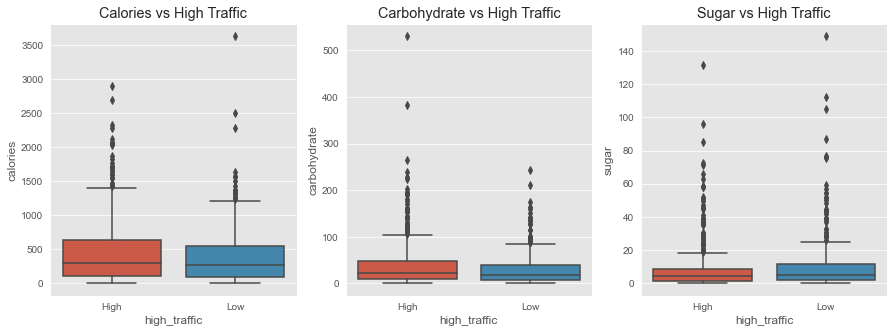

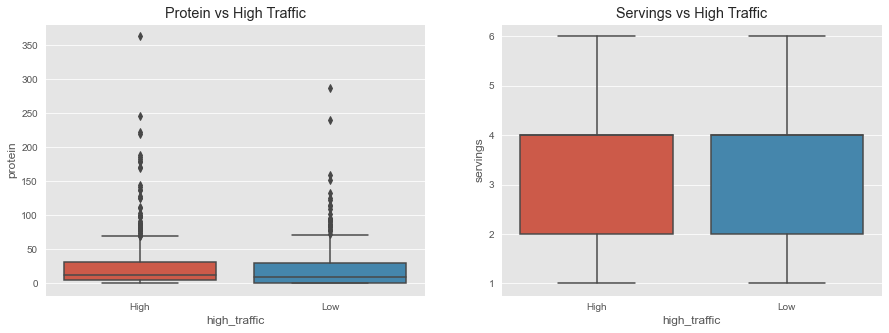

In [9]:
fig, axes = plt.subplots(1,3,figsize=(15,5))

sns.boxplot(data=df,x='high_traffic',y='calories',ax=axes[0]).set(title='Calories vs High Traffic')
sns.boxplot(data=df,x='high_traffic',y='carbohydrate',ax=axes[1]).set(title='Carbohydrate vs High Traffic')
sns.boxplot(data=df,x='high_traffic',y='sugar',ax=axes[2]).set(title='Sugar vs High Traffic')

fig1,axes1 = plt.subplots(1,2,figsize = (15,5))
sns.boxplot(data=df,x='high_traffic',y='protein',ax=axes1[0]).set(title='Protein vs High Traffic')
sns.boxplot(data=df,x='high_traffic',y='servings',ax=axes1[1]).set(title='Servings vs High Traffic')

### Categorical Variables category, servings and high_traffic
Since category and servings are most related to traffic, I checked their characteristics. From the bar chart below, the most common categories are Beverages and Chicken. Also, the most servings is 4.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Potato'),
  Text(1, 0, 'Breakfast'),
  Text(2, 0, 'Beverages'),
  Text(3, 0, 'One Dish Meal'),
  Text(4, 0, 'Chicken'),
  Text(5, 0, 'Lunch/Snacks'),
  Text(6, 0, 'Pork'),
  Text(7, 0, 'Vegetable'),
  Text(8, 0, 'Meat'),
  Text(9, 0, 'Dessert')])

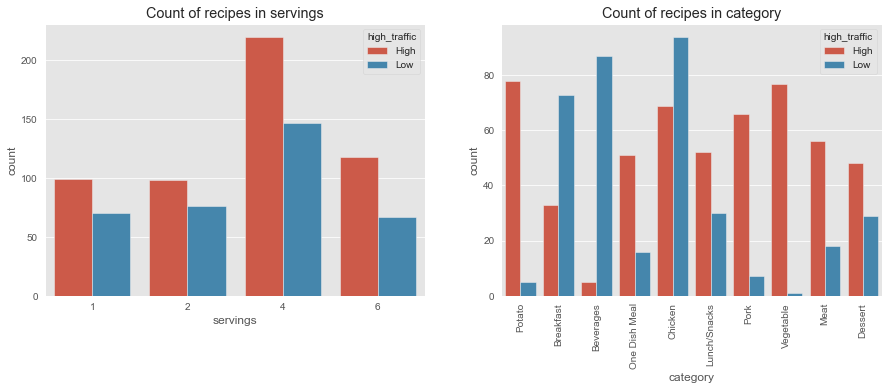

In [10]:
fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.countplot(data=df,x='servings',hue='high_traffic',ax=axes[0]).set(title = 'Count of recipes in servings')
sns.countplot(data=df,x='category',hue='high_traffic',ax=axes[1]).set(title = 'Count of recipes in category')
plt.xticks(rotation = 90)
